## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# In Numpy this is how you find unique no. of values
len(np.unique(x_train))

256

In [5]:
# There are 60K in train and 10K in test

### Find dimensions of an image in the dataset

In [6]:
x_train[0].shape

# Each image is 28*28 pixels

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [7]:
y_train_labels = keras.utils.to_categorical(y_train)
y_test_labels = keras.utils.to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [8]:
x_train_norm = x_train/255
x_test_norm = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [9]:
channels = 1

In [10]:
x_train_reshaped = x_train_norm.reshape(x_train_norm.shape[0], x_train_norm.shape[1], x_train_norm.shape[2], channels)
x_test_reshaped = x_test_norm.reshape(x_test_norm.shape[0], x_test_norm.shape[1], x_test_norm.shape[2], channels)

In [11]:
x_train_reshaped.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, Convolution3D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
# Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0915 15:48:38.252751 30668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
W0915 15:48:38.266738 30668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0915 15:48:38.268732 30668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Ke

In [14]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=5 )

BATCH_SIZE = 32
EPOCHS = 10
    
    
model1.fit(x_train_reshaped, y_train_labels, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test_reshaped, y_test_labels), callbacks=[es])
           
           


C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.
W0915 15:48:38.432220 30668 deprecation.py:323] From C:\Users\Beejal\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0915 15:48:38.484082 30668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.3720 - acc: 0.8660 - val_loss: 0.2891 - val_acc: 0.8955
Epoch 2/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.2297 - acc: 0.9156 - val_loss: 0.2639 - val_acc: 0.9026
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1666 - acc: 0.9375 - val_loss: 0.2572 - val_acc: 0.9136
Epoch 4/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1180 - acc: 0.9565 - val_loss: 0.2677 - val_acc: 0.9121
Epoch 5/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.0801 - acc: 0.9696 - val_loss: 0.2854 - val_acc: 0.9159
Epoch 6/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0525 - acc: 0.9803 - val_loss: 0.3487 - val_acc: 0.9154
Epoch 7/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.0363 - acc: 0.9864 - val_loss: 0.

In [15]:
result1 = model1.evaluate(x_test_reshaped, y_test_labels)
result1

10000/10000 [==============================] - 2s 192us/step


[0.45082228901986965, 0.9118]

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
W0915 15:52:00.342762 30668 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0915 15:52:00.371199 30668 deprecation.py:506] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [18]:
model2.fit(x_train_reshaped, y_train_labels, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test_reshaped, y_test_labels), callbacks=[es])

C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.3932 - acc: 0.8583 - val_loss: 0.3229 - val_acc: 0.8840
Epoch 2/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.2613 - acc: 0.9027 - val_loss: 0.2646 - val_acc: 0.9034
Epoch 3/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.2140 - acc: 0.9208 - val_loss: 0.2453 - val_acc: 0.9112
Epoch 4/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.1782 - acc: 0.9333 - val_loss: 0.2372 - val_acc: 0.9145
Epoch 5/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.1493 - acc: 0.9430 - val_loss: 0.2215 - val_acc: 0.9242
Epoch 6/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.1275 - acc: 0.9521 - val_loss: 0.2336 - val_acc: 0.9232
Epoch 7/10
60000/60000 [==============================] - 38s 632us/step - loss: 0.1072 - acc: 0.9597 - val_loss: 0.

In [19]:
result2 = model2.evaluate(x_test_reshaped, y_test_labels)
result2

10000/10000 [==============================] - 2s 233us/step


[0.2813360418856144, 0.922]

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train_reshaped)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

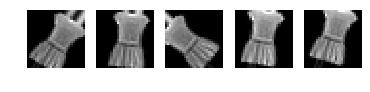

In [21]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [22]:
model2.fit_generator(datagen.flow(x_train_reshaped, y_train_labels,
                    batch_size=32),
                    samples_per_epoch=x_train_reshaped.shape[0],
                    nb_epoch=EPOCHS,
                    validation_data=(x_test_reshaped, y_test_labels), callbacks=[es])

Epoch 1/10
   7/1875 [..............................] - ETA: 46s - loss: 3.2439 - acc: 0.3884

C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\Beejal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  """


1875/1875 [==============================] - 42s 22ms/step - loss: 0.7255 - acc: 0.7308 - val_loss: 0.3707 - val_acc: 0.8724
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5491 - acc: 0.7945 - val_loss: 0.3255 - val_acc: 0.8857
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4995 - acc: 0.8145 - val_loss: 0.3267 - val_acc: 0.8846
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4628 - acc: 0.8291 - val_loss: 0.3263 - val_acc: 0.8853
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4424 - acc: 0.8364 - val_loss: 0.3184 - val_acc: 0.8870
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4270 - acc: 0.8411 - val_loss: 0.3245 - val_acc: 0.8861
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4131 - acc: 0.8467 - val_loss: 0.3097 - val_acc: 0.8880
Epoch 8/10
1875/1875 [==============================] - 36s

In [23]:
result3 = model2.evaluate(x_test_reshaped, y_test_labels)
result3

10000/10000 [==============================] - 2s 173us/step


[0.32135687841176985, 0.8854]

###  Report the final train and validation accuracy

In [24]:
# Here I print only the validation (test) loss and accuracy. But same can be done for train too easily.
final_result = pd.DataFrame(data={"model" : ['Model#1 (2 Conv Layers)', 'Model#2 (2 Conv Layers, MaxPool, Dropout)', 'Model#3 (Model 2 with Augmented Data)'],
    "loss": [result1[0], result2[0], result3[0]], 
                                 "accuracy": [result1[1], result2[1], result3[1]]})
final_result

,model,loss,accuracy
0,Model#1 (2 Conv Layers),0.450822,0.9118
1,"Model#2 (2 Conv Layers, MaxPool, Dropout)",0.281336,0.9220
2,Model#3 (Model 2 with Augmented Data),0.321357,0.8854


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [25]:
from keras.datasets import cifar10

In [26]:
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train_num, 100)
y_test = np_utils.to_categorical(y_test_num, 100)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [27]:
# Already done before

### **Prepare/fit the generator.**

In [28]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

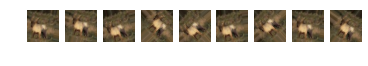

In [29]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[3:4], batch_size=1)
for i in range(1, 10):
    plt.subplot(1,9,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()